# 1. Data Collection and Preparation

## 1.1: Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
pwd

'C:\\Users\\Saumya\\Downloads'

## 1.2: Read the dataset

In [ ]:
data = pd.read_csv("C:\\Users\\Saumya\\Downloads\\fetal_health.csv")

In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.shape

(2126, 22)

# 2. Exploratory data analysis

## 2.1: Descriptive Statitics

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [ ]:
data.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

## 2.2: Visual Analysis

### 2.2.1: Univatriate Analysis

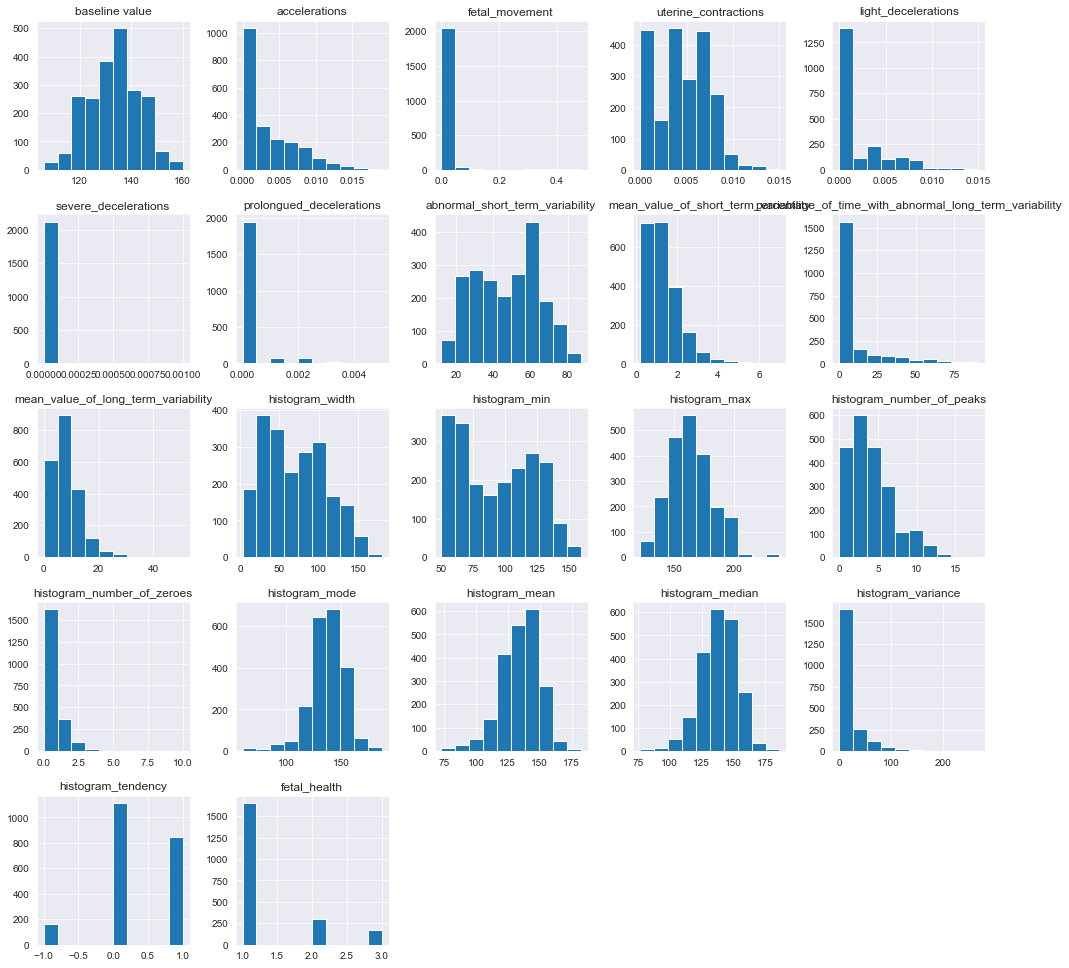

In [ ]:
data.hist(figsize=(17,17), layout=(5,5), sharex=False);

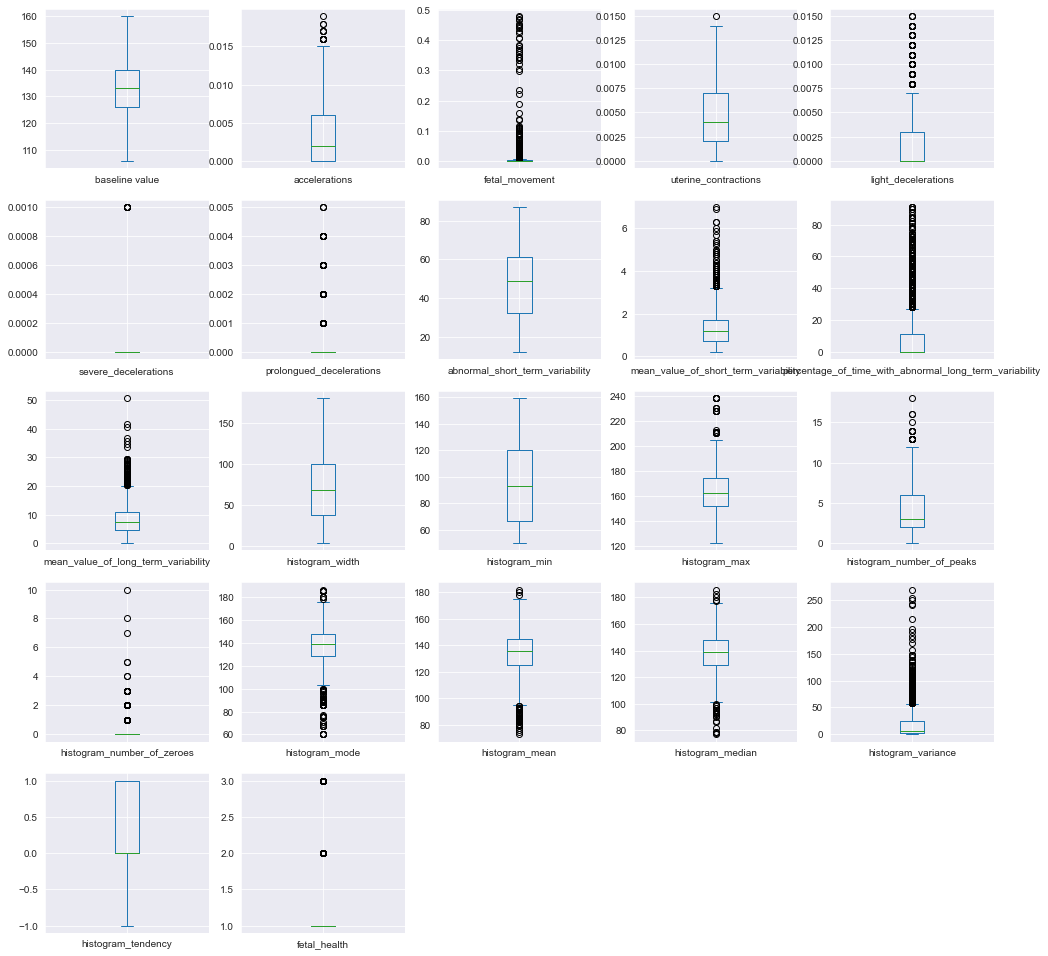

In [ ]:
data.plot(kind='box', figsize=(17,17), layout=(5,5), sharex=False, subplots= True);

### 2.2.2: Multivariate Analysis

<AxesSubplot:>

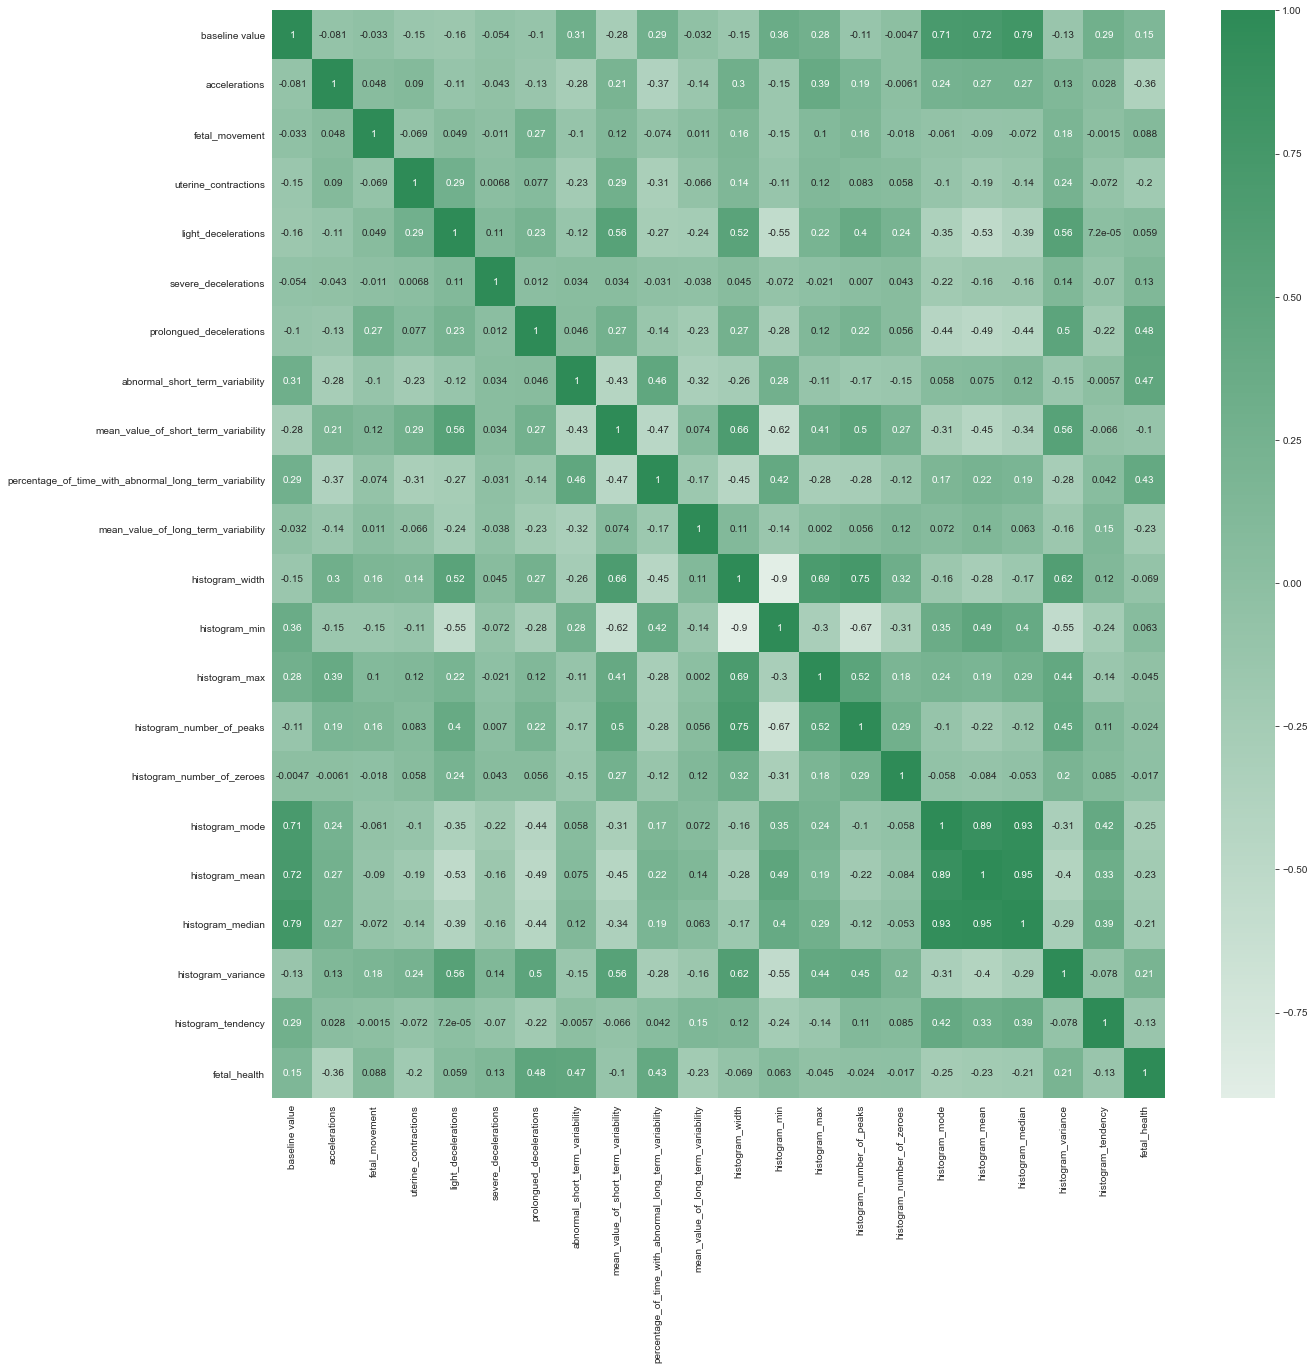

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))

cmap = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

### 2.2.3: Feature Selection

In [ ]:
data.drop(columns=["histogram_mean"], axis=1, inplace=True)

In [ ]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [ ]:
new_data=data.drop(columns=["baseline value", "severe_decelerations", "fetal_movement", "histogram_min", "light_decelerations", "histogram_number_of_zeroes", "histogram_number_of_peaks", "histogram_max", "histogram_width", "mean_value_of_short_term_variability", "histogram_tendency", "uterine_contractions"], axis=1, inplace=True)



> Indented block

> Indented block





In [ ]:
new_data=data.loc[:,["prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "histogram_variance", "histogram_median", "mean_value_of_long_term_variability", "histogram_mode", "accelerations"]]

In [ ]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,73.0,43.0,73.0,121.0,2.4,120.0,0.000
1,0.0,17.0,0.0,12.0,140.0,10.4,141.0,0.006
2,0.0,16.0,0.0,13.0,138.0,13.4,141.0,0.003
3,0.0,16.0,0.0,13.0,137.0,23.0,137.0,0.003
4,0.0,16.0,0.0,11.0,138.0,19.9,137.0,0.007


### X and y split after feature selection

In [ ]:
X=new_data

In [ ]:
X.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,73.0,43.0,73.0,121.0,2.4,120.0,0.000
1,0.0,17.0,0.0,12.0,140.0,10.4,141.0,0.006
2,0.0,16.0,0.0,13.0,138.0,13.4,141.0,0.003
3,0.0,16.0,0.0,13.0,137.0,23.0,137.0,0.003
4,0.0,16.0,0.0,11.0,138.0,19.9,137.0,0.007


In [ ]:
y=data["fetal_health"]
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

### 2.2.4: Scaling the data

In [ ]:
X = data.drop(columns=['fetal_health'])
y = data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scaled.head()

,accelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_median,histogram_variance
0,0.000000,0.0,0.813333,0.472527,0.047337,0.472441,0.403670,0.271375
1,0.315789,0.0,0.066667,0.000000,0.205128,0.637795,0.577982,0.044610
2,0.157895,0.0,0.053333,0.000000,0.264300,0.637795,0.559633,0.048327
3,0.157895,0.0,0.053333,0.000000,0.453649,0.606299,0.550459,0.048327
4,0.368421,0.0,0.053333,0.000000,0.392505,0.606299,0.559633,0.040892


### 2.2.5: Checking if the dataset is balanced or not

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

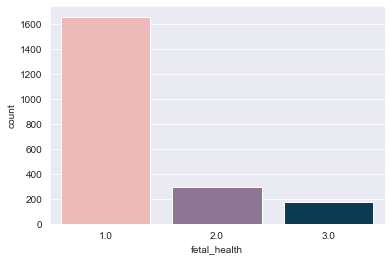

In [ ]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

#### THE DATASET TURNS OUT TO BE IMBALANCED

# 3. Training the model

## 3.1: Training the model before balancing the dataset to see the accuracy

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape

((1488, 8), (638, 8))

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
predictions=RF_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
pd.crosstab(y_test, predictions)

0.9608150470219435


col_0,1.0,2.0,3.0
fetal_health,,,
1.0,489,4,4
2.0,15,78,1
3.0,0,1,46


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       497
         2.0       0.94      0.83      0.88        94
         3.0       0.90      0.98      0.94        47

    accuracy                           0.96       638
   macro avg       0.94      0.93      0.93       638
weighted avg       0.96      0.96      0.96       638



### 3.1.1: Applying SMOTE for balancing the data

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter
print ("Before SMOTE :" , Counter(y_train))
print ("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1.0: 1158, 2.0: 201, 3.0: 129})
After SMOTE : Counter({1.0: 1158, 2.0: 1158, 3.0: 1158})


### 3.1.2: Dataset is balanced

In [ ]:
y_train_smote.value_counts()

1.0    1158
2.0    1158
3.0    1158
Name: fetal_health, dtype: int64

## 3.2: Training the model after applying SMOTE

In [ ]:
RF_model.fit(X_train_smote, y_train_smote)
predictions=RF_model.predict(X_test)
print(accuracy_score(y_test,predictions))
pd.crosstab(y_test, predictions)

0.9467084639498433


col_0,1.0,2.0,3.0
fetal_health,,,
1.0,481,12,4
2.0,14,79,1
3.0,2,1,44


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       497
         2.0       0.86      0.84      0.85        94
         3.0       0.90      0.94      0.92        47

    accuracy                           0.95       638
   macro avg       0.91      0.91      0.91       638
weighted avg       0.95      0.95      0.95       638



# Trainig the model through multiple algorithms

## 1. Random Forest

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_smote, y_train_smote)
predictions=RF_model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.95141065830721


In [ ]:
size = X_train_smote.shape[0]
size

3474

For the amounts of training data is:  3474
Accuracy of RandomForestClassifier:  0.95141065830721


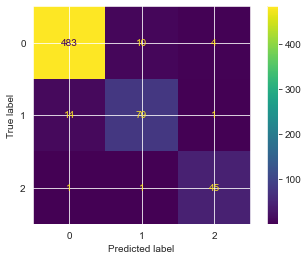

In [ ]:
print("For the amounts of training data is: ",size)
print("Accuracy of RandomForestClassifier: ",RF_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## 2. Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train_smote, y_train_smote)
predictions = LR_model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7931034482758621


For the amounts of training data is:  3474
Accuracy of LogisticRegression:  0.7931034482758621


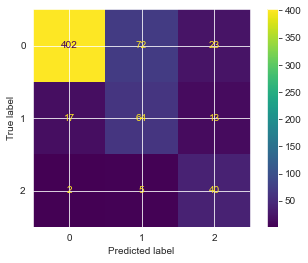

In [ ]:
print("For the amounts of training data is: ",size)
print("Accuracy of LogisticRegression: ",LR_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## 3. Decision Tree

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote, y_train_smote)
predictions = DT_model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.945141065830721


For the amounts of training data is:  3474
Accuracy of DecisionTreeClassifier:  0.945141065830721


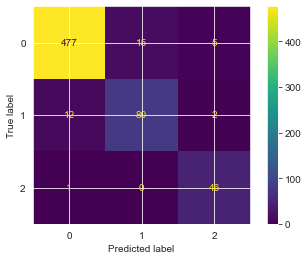

In [ ]:
print("For the amounts of training data is: ",size)
print("Accuracy of DecisionTreeClassifier: ",DT_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## 4. K-Nearest Neighbors

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_smote, y_train_smote)
predictions = KNN_model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.890282131661442


For the amounts of training data is:  3474
Accuracy of KNeighborsClassifier:  0.890282131661442


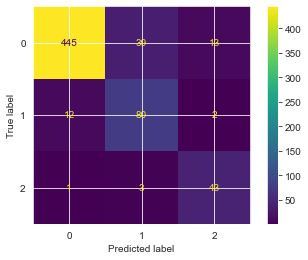

In [ ]:
print("For the amounts of training data is: ",size)
print("Accuracy of KNeighborsClassifier: ",KNN_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
names = ["Random Forest Classifier", "Logistic Regression", "Decision Tree Classifier", "K Neighbors Classifier"]
classifiers=[RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=5)]

In [ ]:
scores= []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_smote, y_train_smote)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [ ]:
scores

[0.9529780564263323, 0.7931034482758621, 0.9388714733542319, 0.890282131661442]

# 4. Analysis of model performance

## 4.1: Create dataframe of model performance

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Random Forest Classifier,0.952978
1,Logistic Regression,0.793103
2,Decision Tree Classifier,0.938871
3,K Neighbors Classifier,0.890282


## 4.2: Adding colors to the dataframe

In [ ]:
CM=sns.light_palette("red", as_cmap=True)
C = df.style.background_gradient(cmap=CM)
C

,name,score
0,Random Forest Classifier,0.952978
1,Logistic Regression,0.793103
2,Decision Tree Classifier,0.938871
3,K Neighbors Classifier,0.890282


## 4.3: Bar plot of model performance

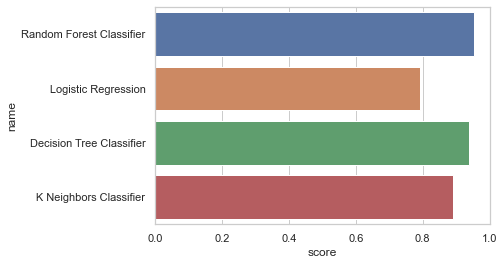

In [ ]:
sns.set(style="whitegrid")
ax=sns.barplot(y="name", x="score", data=df)

In [ ]:
r1=RF_model.predict([[0.315, 0.0, 0.0533, 0.000, 0.2643, 0.606, 0.577, 0.044]])
r1

array([1.])

In [ ]:
RF_model.predict([[0.345, 0.1225, 23346, 0.23456, 0.987, 2345, 123, 0]])

array([1.])

In [ ]:
RF_model.predict([[0.000, 0.0, 73.0, 43.0, 2.4, 73.0, 120.0, 121.0]])

array([2.])

In [ ]:
# saving the model

import pickle
pickle.dump(RF_model,open('fetal_health1.pkl','wb'))

In [ ]:
pwd

'C:\\Users\\Saumya\\Downloads'